In [1]:
#Importing necessary libraries

import numpy as np
import seaborn as sns
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading Data

Patient_data = pd.read_csv('Pima_Indian_diabetes.csv')

# 1. Exploratory Data Analysis


### 1.1 Statistics of available data

In [3]:
Patient_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 1.2 First 10 rows data of the data set

In [4]:
Patient_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,0.0,33.600000,0.627,50.000000,1
1,1.0,85.0,66.000000,29.0,0.0,26.600000,0.351,31.000000,0
2,8.0,183.0,64.000000,0.0,0.0,23.300000,0.672,32.000000,1
3,1.0,89.0,66.000000,23.0,94.0,19.179925,0.167,21.000000,0
4,0.0,137.0,40.000000,35.0,168.0,43.100000,2.288,33.000000,1
5,5.0,116.0,74.000000,0.0,0.0,25.600000,0.201,30.000000,0
6,3.0,78.0,43.869346,32.0,88.0,31.000000,0.248,26.000000,1
7,10.0,115.0,0.000000,0.0,0.0,35.300000,0.134,29.000000,0
8,2.0,197.0,70.000000,45.0,543.0,30.500000,0.158,NaN,1
9,8.0,125.0,96.000000,NaN,0.0,0.000000,0.232,68.636341,1


### 1.3 Count of people with and without diabetes 

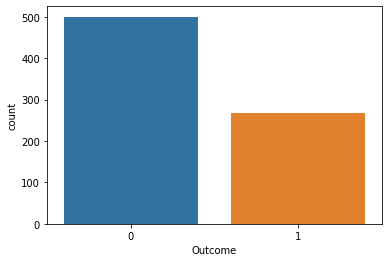

In [5]:
# Count of people with and without diabetes 
sns.countplot(x='Outcome',data=Patient_data)

### 1.4 Check the amount of null values present in data set which will be useful at the time of data cleaning

In [6]:
#Calculate the total null entries in each column
Patient_data.isnull().sum()

Pregnancies                 26
Glucose                     16
BloodPressure                0
SkinThickness               22
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                         19
Outcome                      0
dtype: int64

### 1.5 Check the amount of zero values present in data set  

In [7]:
#Finding number of 0 values in each column
print("BMI: ", Patient_data[Patient_data.BMI==0].shape[0])
print("Glucose: ",Patient_data[Patient_data.Glucose==0].shape[0])
print("Insulin: ",Patient_data[Patient_data.Insulin==0].shape[0])
print("SkinThickness: ",Patient_data[Patient_data.SkinThickness==0].shape[0])
print("BloodPressure: ",Patient_data[Patient_data.BloodPressure==0].shape[0])
print("Age: ",Patient_data[Patient_data.Age==0].shape[0])
print("Diabetes Pedigree Function: ",Patient_data[Patient_data.DiabetesPedigreeFunction==0].shape[0])
print("Pregnancies: ",Patient_data[Patient_data.Pregnancies==0].shape[0])

BMI:  10
Glucose:  5
Insulin:  374
SkinThickness:  215
BloodPressure:  32
Age:  0
Diabetes Pedigree Function:  0
Pregnancies:  106


### 1.6 Ploting distribution graph for each feature present in data set with outcome 0 and 1 which will help to determine whether to use mean or median to replace false values. If the distribution of values are spread equally then mean is preferred else if they are concentrated over a certain range then median is prefered

### Glucose

Text(0, 0.5, 'Outcome=1')

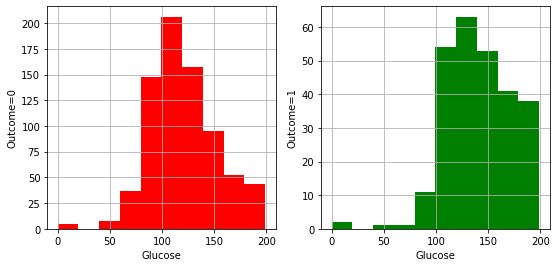

In [8]:
#ploting distribution of Glucose column with outcome 0(non diabetic) and 1(diabetic) 

#plot for outcome 0
X=Patient_data[Patient_data['Outcome']==0]
plt.subplot(2,2,1)
X=Patient_data.iloc[:,1]
X.hist(figsize=(9,9),color='r')
plt.xlabel('Glucose')
plt.ylabel('Outcome=0')

#plot for outcome 1
Y=Patient_data[Patient_data['Outcome']==1]
Y=Y.iloc[:,1]
plt.subplot(2,2,2)
Y.hist(figsize=(9,9),color='g')
plt.xlabel('Glucose')
plt.ylabel('Outcome=1')

### Skin Thickness

Text(0, 0.5, 'Outcome=1')

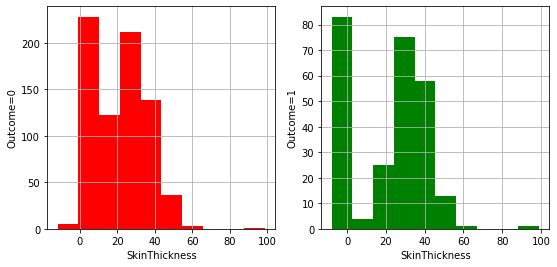

In [9]:
#ploting distribution of SkinThickness column with outcome 0(non diabetic) and 1(diabetic) 

#plot for outcome 0
X=Patient_data[Patient_data['Outcome']==0]
plt.subplot(2,2,1)
X=Patient_data.iloc[:,3]
X.hist(figsize=(9,9),color='r')
plt.xlabel('SkinThickness')
plt.ylabel('Outcome=0')

#plot for outcome 1
Y=Patient_data[Patient_data['Outcome']==1]
Y=Y.iloc[:,3]
plt.subplot(2,2,2)
Y.hist(figsize=(9,9),color='g')
plt.xlabel('SkinThickness')
plt.ylabel('Outcome=1')

### Blood Pressure

Text(0, 0.5, 'Outcome=1')

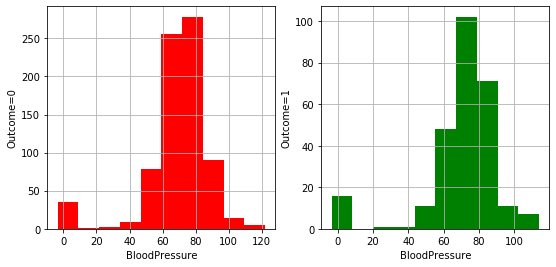

In [10]:
#ploting distribution of BloodPressure  column with outcome 0(non diabetic) and 1(diabetic) 

#plot for outcome 0
X=Patient_data[Patient_data['Outcome']==0]
plt.subplot(2,2,1)
X=Patient_data.iloc[:,2]
X.hist(figsize=(9,9),color='r')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome=0')

#plot for outcome 1
Y=Patient_data[Patient_data['Outcome']==1]
Y=Y.iloc[:,2]
plt.subplot(2,2,2)
Y.hist(figsize=(9,9),color='g')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome=1')

### Pregnancies

Text(0, 0.5, 'Outcome=1')

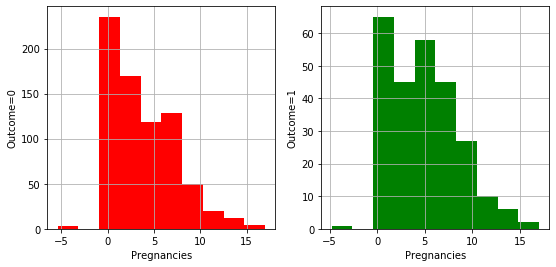

In [11]:
#ploting distribution of Pregnancies column with outcome 0(non diabetic) and 1(diabetic) 

#plot for outcome 0
X=Patient_data[Patient_data['Outcome']==0]
plt.subplot(2,2,1)
X=Patient_data.iloc[:,0]
X.hist(figsize=(9,9),color='r')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome=0')

#plot for outcome 1
Y=Patient_data[Patient_data['Outcome']==1]
Y=Y.iloc[:,0]
plt.subplot(2,2,2)
Y.hist(figsize=(9,9),color='g')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome=1')

### Insulin

Text(0, 0.5, 'Outcome=1')

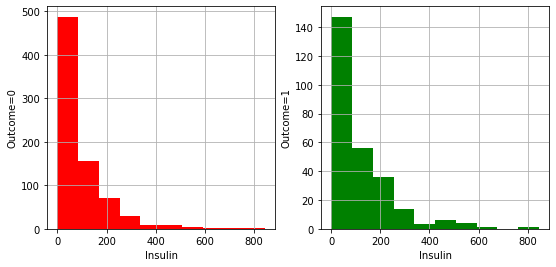

In [12]:
#ploting distribution of Insulin column with outcome 0(non diabetic) and 1(diabetic) 

#plot for outcome 0
X=Patient_data[Patient_data['Outcome']==0]
plt.subplot(2,2,1)
X=Patient_data.iloc[:,4]
X.hist(figsize=(9,9),color='r')
plt.xlabel('Insulin')
plt.ylabel('Outcome=0')

#plot for outcome 1
Y=Patient_data[Patient_data['Outcome']==1]
Y=Y.iloc[:,4]
plt.subplot(2,2,2)
Y.hist(figsize=(9,9),color='g')
plt.xlabel('Insulin')
plt.ylabel('Outcome=1')

### BMI

Text(0, 0.5, 'Outcome=1')

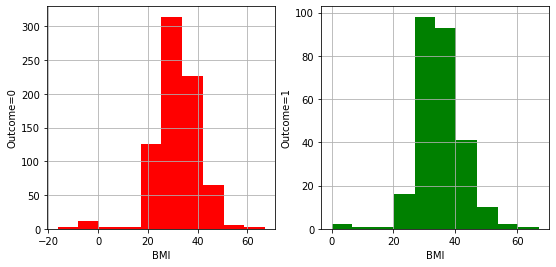

In [13]:
#ploting distribution of Body mass index(BMI) column with outcome 0(non diabetic) and 1(diabetic) 

#plot for outcome 0
X=Patient_data[Patient_data['Outcome']==0]
plt.subplot(2,2,1)
X=Patient_data.iloc[:,5]
X.hist(figsize=(9,9),color='r')
plt.xlabel('BMI')
plt.ylabel('Outcome=0')

#plot for outcome 1
Y=Patient_data[Patient_data['Outcome']==1]
Y=Y.iloc[:,5]
plt.subplot(2,2,2)
Y.hist(figsize=(9,9),color='g')
plt.xlabel('BMI')
plt.ylabel('Outcome=1')

### Age

Text(0, 0.5, 'Outcome=1')

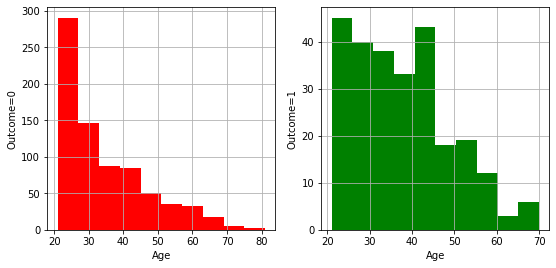

In [14]:
#ploting distribution of Age column with outcome 0(non diabetic) and 1(diabetic) 

#plot for outcome 0
X=Patient_data[Patient_data['Outcome']==0]
plt.subplot(2,2,1)
X=Patient_data.iloc[:,7]
X.hist(figsize=(9,9),color='r')
plt.xlabel('Age')
plt.ylabel('Outcome=0')

#plot for outcome 1
Y=Patient_data[Patient_data['Outcome']==1]
Y=Y.iloc[:,7]
plt.subplot(2,2,2)
Y.hist(figsize=(9,9),color='g')
plt.xlabel('Age')
plt.ylabel('Outcome=1')

### Diabetes Pedigree Function

Text(0, 0.5, 'Outcome=1')

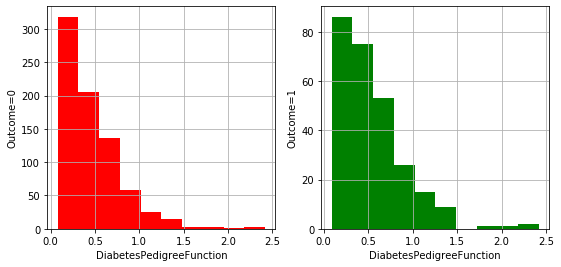

In [15]:
#ploting distribution of DiabetesPedigreeFunction column with outcome 0(non diabetic) and 1(diabetic) 

#plot for outcome 0
X=Patient_data[Patient_data['Outcome']==0]
plt.subplot(2,2,1)
X=Patient_data.iloc[:,6]
X.hist(figsize=(9,9),color='r')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Outcome=0')

#plot for outcome 1
Y=Patient_data[Patient_data['Outcome']==1]
Y=Y.iloc[:,6]
plt.subplot(2,2,2)
Y.hist(figsize=(9,9),color='g')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Outcome=1')

### 1.7 Observing correlation between the features to get the idea of which feature has dominance over the outcome and which are less likely to affect the outcome

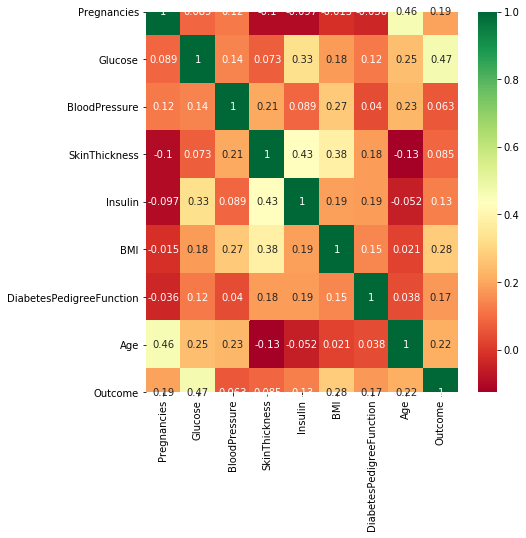

In [16]:
plt.subplots(figsize=(7,7))

sns.heatmap(Patient_data.corr(),annot=True,cmap='RdYlGn')

From the correlation plot below are some of observations:
1. Glucose has greater impact on outcome than any other feature so it can be considered important feature for prediction outcome
2. Other features that has some what impact on outcome are BMI, Age

# 2. Data Cleaning

From the Exploratory Data Analysis, we note that there are some invalid and missing data values occuring in data set i.e
    1. None of Pregnancies can be -ve
    2. Blood Pressure cannot be -ve or 0
    3. Any person has minimum skin thickness of 0.5mm (using domain knowledge) so it              cannot be 0 or -ve
    4. Age cannot be in floating point or 0(assuming age is in years)
    5. BMI cannot be 0 or -ve (using domain knowledge)
    6. Glucose and Insulin(for outcome 1) cannot be 0 (using domain knowledge)
    
    
   

### Pregnancies

In [17]:
#If Pregnancies col. has -ve than we replace it with mode as it is will be replaced by most number of pregnancies
#If pregnancies is a floating number than make it to integer

#function for imputing invalid values with valid ones for pregnancies

def impute_values_for_pragn(cols):
    a = cols[0]
    if a<0 or pd.isnull(a):
        return Patient_data['Pregnancies'].mode() 
    else: 
        return a.astype(int)

#apply impute function
Patient_data['Pregnancies'] = Patient_data[['Pregnancies']].apply(impute_values_for_pragn,axis=1)    

### Blood Pressure

In [18]:
#If BloodPressure col. has value -ve or 0 or nil than make it to 0 or integer
#why mean -> because from distribution plot of bloodpressure we conclude that median or mean will
#not make difference as the curve is distributed equally 

#function for imputing invalid values with mean for blood pressure

def impute_values_for_bp(cols):
    a = cols[0]
    if a<=0 or pd.isnull(a):
        return Patient_data['BloodPressure'].mean() 
    else: 
        return a

#apply impute function
Patient_data['BloodPressure'] = Patient_data[['BloodPressure']].apply(impute_values_for_bp,axis=1)    

### Skin Thickness

In [19]:
#If SkinThickness col. has value <0.5mm or nil than replace it with the median of the distribution
#why median -> because from distribution plot of SkinThickness, we can see the graph is more skewed towards -
#a particular range 

#function for imputing invalid values with valid ones i.e 0.5mm for skin thickness 

def impute_values_for_skinth(cols):
    a=cols[0]
    if(a<0.5 or pd.isnull(a)):
        return Patient_data['SkinThickness'].median() 
    else:
        return a
    
Patient_data['SkinThickness'] = Patient_data[['SkinThickness']].apply(impute_values_for_skinth,axis=1)    

### Age

In [20]:
#If Age col. has value 0 or nil than replace it with the median of the distribution
#why median -> from the distribution plot of ages, frequent occurence of ages between 21-29 is observed
#better to replace it with median

#function for replacing 0 or nil age with median 

import random
def impute_age(cols):
    a=cols[0]
    if a==0 or pd.isnull(a):
        return Patient_data['Age'].median() 
    else :
        return a.astype(int)
    
Patient_data['Age'] = Patient_data[['Age']].apply(impute_age,axis=1)    

### Insulin Case 1:  Outcome = 1  

In [21]:
#If outcome is 1 i.e patient has diabetes than insulin should be less than 16(using domain knowledge)
#So replacing null values with median
#why median -> for outcome=1 the distribution plot for insulin shows skewness so median would be better

X=(Patient_data[Patient_data['Outcome']==1])['Insulin'] #check if outcome=1

median_insulin=X.median() #replacing with medain

def impute_insulin(cols):
    a = cols[0]
    b = cols[1]
    if pd.isnull(a) and b==1:
        return median_insulin
    else :
        return a
Patient_data['Insulin'] = Patient_data[['Insulin','Outcome']].apply(impute_insulin,axis=1)


### Insulin Case 2:  Outcome = 0

In [22]:
#If outcome is 0 i.e patient doesn't have diabetes than insulin should be between 16 and 166(using domain knowledge)
#So replacing null or 0 with median
#why median -> for outcome=0 the distribution plot for insulin shows skewness so median would be better


X=(Patient_data[Patient_data['Outcome']==0])['Insulin']
X=X.replace(0,np.nan) # First replacing 0 values by nan so that dropping nan is easy
X=X.dropna()
median_insulin=X.median() #replacing with medain

def impute_insulin(cols):
    a = cols[0]
    b = cols[1]
    if (pd.isnull(a) or a<=0 and b==0) :
        return median_insulin
    else :
        return a
Patient_data['Insulin'] = Patient_data[['Insulin','Outcome']].apply(impute_insulin,axis=1)


### Glucose Case 1: Outcome=1

In [23]:
#If outcome is 1 i.e patient has diabetes ,than Glucose should be more than 140
#So replacing null or 0 by mean
#why mean -> from distribution plot mean will be a better guess as graph is equally distributed


X=(Patient_data[Patient_data['Outcome']==1])['Glucose']
X=X.replace(0,np.nan)  # First replacing 0 values by nan so that dropping nan is easy
X=X.dropna()
mean_glucose=X.mean()  #replacing with mean

def impute_glucose(cols):
    a = cols[0]
    b = cols[1]
    if ((pd.isnull(a) or a<=0) and b==1) :
        return mean_glucose
    else :
        return a
Patient_data['Glucose'] = Patient_data[['Glucose','Outcome']].apply(impute_glucose,axis=1)


### Glucose Case 2: Outcome=0

In [24]:
#If outcome is 0 i.e patient doesn't have diabetes ,than Glucose should less than 140
#So replacing null or 0 by mean
#why mean -> from distribution plot here also mean will be a better guess as graph is equally distributed

X=(Patient_data[Patient_data['Outcome']==0])['Glucose']
X=X.replace(0,np.nan) # First replacing 0 values by nan so that dropping nan is easy
X=X.dropna()
mean_glucose=X.mean()  #replacing with mean

def impute_glucose(cols):
    a = cols[0]
    b = cols[1]
    if ((pd.isnull(a) or a<=0) and b==0) :
        return mean_glucose
    else :
        return a
Patient_data['Glucose'] = Patient_data[['Glucose','Outcome']].apply(impute_glucose,axis=1)


### BMI

In [25]:
#BMI cannot be -ve or 0 or null so replacing it with median as from the graph of BMI vs outcome it can be 
#seen that values are more concentrated between 20 to 40

def impute_bmi(cols):
    a = cols[0]
    if pd.isnull(a) or a<=0 : 
        return Patient_data['BMI'].median() 
    else:
        return a
Patient_data['BMI'] = Patient_data[['BMI']].apply(impute_bmi,axis=1)

In [26]:
#After cleaning no entry should be null 

Patient_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

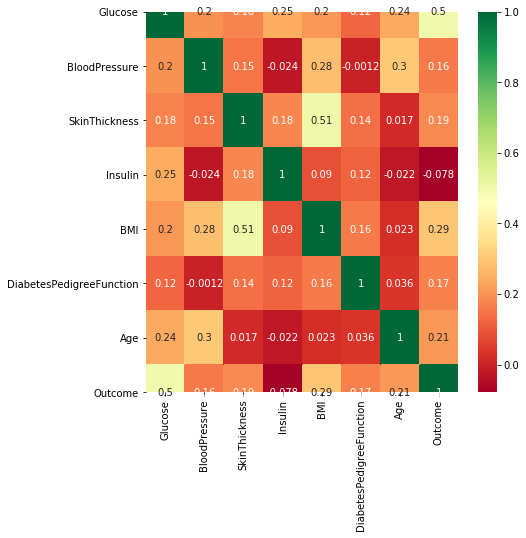

In [27]:
plt.figure(figsize=(7,7))
sns.heatmap(Patient_data.corr(),annot=True,cmap='RdYlGn')

In [28]:
Patient_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As inabove plot we can see our data is cleaned and no null values can be found
hence we are ready to use data

# 3.Train and Testing Data

In [29]:
X = Patient_data.drop('Outcome',axis=1)
y = Patient_data['Outcome']


In [30]:
#Splitting data into test(20%) and train(80%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [31]:
#Converting into Standard scale so that each feature has mean=0 and standard deviation=1

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


### Logistic Regression is used in case of binary classification. Here we need to predict whether a patient has diabetes or not depending on whether outcome is 0 or 1. So this problem is similar to binary classification. 

In [32]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression();

In [33]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_predictions = logmodel.predict(X_test)

In [35]:
#Accuracy of model
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_predictions,y_test)*100)

Accuracy:  85.06493506493507


In [36]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       100
           1       0.83      0.72      0.77        54

    accuracy                           0.85       154
   macro avg       0.84      0.82      0.83       154
weighted avg       0.85      0.85      0.85       154



In [37]:
#Confusion matrix
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, y_predictions)
results

array([[92,  8],
       [15, 39]])